# <font color='red'>Data management</font>

## HEC Liège | Course project "Inside AirBnB"

Group members : Rachelle DAOUDI, Larissa DUTRA, Edom SILESHI

## Our project

We are 3 ERASMUS students and we know that studying in Belgium is a great opportunity to travel around Europe, especially to **Paris**, which is still a popular destination because of its proximity to Liège (only 2 hours by train).

But as students, it can be a **very expensive destination**, especially for accommodation. That's why we decided to do this project on AirBnB, which is a platform for renting accommodation between private individuals. On average, these accommodations are cheaper than hotels, but we wanted to find out where in Paris we could find the cheapest AirBnB accommodations. 

#### Thus, we want to answer the question: <u>Where to find the cheapest accommodation in Paris?</u> 

We would also like to use the Louvre Museum as a point of interest, by imagining a group of students wishing to rent accommodation as close as possible to the **Louvre**. 

# <font color='red'>Part 1: Data collection and cleaning</font>  [Standard]

For the cleaning part, we worked on the **'listings.csv'** file and carried out several actions such as : 
- We deleted all the columns we deemed unnecessary for our project.
- We deleted the rows with missing and aberrant values so as not to encounter any errors in our code or distort our results.
- We converted the price from text to number.
- We created a new variable called 'price_per_person', which is essential for visualisation. 

The new cleaned data set is then saved in a new file called 'cleaned_listings.csv'. 

In [1]:
import pandas as pd 

# Load the data
df = pd.read_csv("listings.csv")

# Count number of rows before cleaning
row_count = len(df)
print("Number of rows before cleaning:", row_count)

Number of rows before cleaning: 56726


In [2]:
# Delete specified columns
columns_to_delete = ["source", "name", "description", "neighborhood_overview", "picture_url", "host_url", "host_name",
                     "host_location", "host_about", "host_thumbnail_url", "host_picture_url", "host_listings_count",
                     "host_total_listings_count", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms", 
                     "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "has_availability", 
                     "availability_30", "availability_60", "availability_90", "calendar_last_scraped","number_of_reviews_ltm", 
                     "number_of_reviews_l30d", "last_review", "host_neighbourhood","calculated_host_listings_count", 
                     "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                     "calculated_host_listings_count_shared_rooms", "reviews_per_month", "listing_url","scrape_id",
                     "last_scraped","host_since", "first_review", "license", "minimum_minimum_nights", "maximum_minimum_nights",
                     "minimum_maximum_nights", "maximum_maximum_nights", "bathrooms_text"]
df = df.drop(columns_to_delete, axis=1)

# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)

id                                 0
host_id                            0
host_response_time             25577
host_response_rate             25577
host_acceptance_rate           21316
host_is_superhost                 40
host_verifications                 0
host_has_profile_pic              18
host_identity_verified            18
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bedrooms                        9095
beds                             753
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
availability_365                   0
number_of_reviews                  0
review_scores_rating           11095
review_scores_accuracy         11618
review_scores_cleanliness      11614
review_scores_checkin          11627
r

In [3]:
# Delete rows with missing values that represent less than 10% of the dataset

df = df[df['host_is_superhost'].notna() & df['host_has_profile_pic'].notna() & df['host_identity_verified'].notna()
        & df['beds'].notna()]

# Change "review_scores" to float with 2 decimal values
review_scores = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", 
                 "review_scores_communication", "review_scores_location", "review_scores_value"]


# Loop over each variable and transform to float with 2 decimal values
for var in review_scores:
    df[var] = df[var].apply(lambda x: round(x, 2))
    
# Transform "host_response_rate" AND "host_acceptance_rate" from text to normalized number

# Transform from text to number
df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

# Normalize the numbers (that go from 0% to 100%) by dividing each value by 100
df['host_response_rate'] = df['host_response_rate'] / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100

# Impute missing values in numerical rows where the missing values represent more than 10% of the dataset
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the columns with missing values
imputer.fit(df[["host_response_rate", "host_acceptance_rate", "bedrooms", "review_scores_rating", 
                "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
                "review_scores_location", "review_scores_value"]])

# Impute the missing values and assign them back to the columns
df[["host_response_rate", "host_acceptance_rate", "bedrooms", "review_scores_rating", 
    "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", 
    "review_scores_location", "review_scores_value"]] = imputer.transform(df[["host_response_rate", "host_acceptance_rate",
                                                        "bedrooms", "review_scores_rating", "review_scores_accuracy",
                                                        "review_scores_cleanliness", "review_scores_checkin",
                                                        "review_scores_communication", "review_scores_location",
                                                        "review_scores_value"]])

# Impute missing values in categorical rows where the missing values represent more than 10% of the dataset
mode_response_time = df['host_response_time'].mode()[0]

# Impute missing values with the mode
df['host_response_time'] = df['host_response_time'].fillna(mode_response_time)

# Identify missing values after deleting and imputing them
missing_values = df.isnull().sum()
print(missing_values)

id                             0
host_id                        0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bo

In [4]:
# Transform price from text to number
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Create new variable "price_per_person"
# Note that the number of persons is represented by the "accommodates" column
df['price_per_person'] = df['price'] / df['accommodates']

# Adjust latitude and longitude values
df['latitude'] = df['latitude'].apply(lambda x: round(x, 7))
df['longitude'] = df['longitude'].apply(lambda x: round(x, 7))

# Delete outliers in "price"
df = df[(df['price'] < 7000)]

# Delete rows where "minimum_nights" is greater than 15
df = df[df['minimum_nights'] <= 15]

# Delete rows where "availability_365" is less than 10
df = df[df['availability_365'] >= 10]

# Save the cleaned data in a new file 
df.to_csv('cleaned_listings.csv', index=False)

In [5]:
# Count number of rows after cleaning
row_count = len(df)
print("Number of rows after cleaning:", row_count)

Number of rows after cleaning: 23341


# <font color='red'>Part 2: Descriptive analysis and graphical representations</font> [Advanced]

### <font color='blue'>N°1 Heatmap : Average housing prices by neighbourhood in Paris</font> 

Firstly, we wanted to use the 'cleaned_listings.csv' file to create a **heatmap** of Paris showing the average prices per neighbourhood, in order to get an idea of the most and least expensive areas of the capital. 

We've included the names of the different neighbourhoods to make it easier to understand. 

To obtain the neighbourhoods, we used the 'neighbourhoods.geojson' file, which displays the shape of the neighbourhoods. 

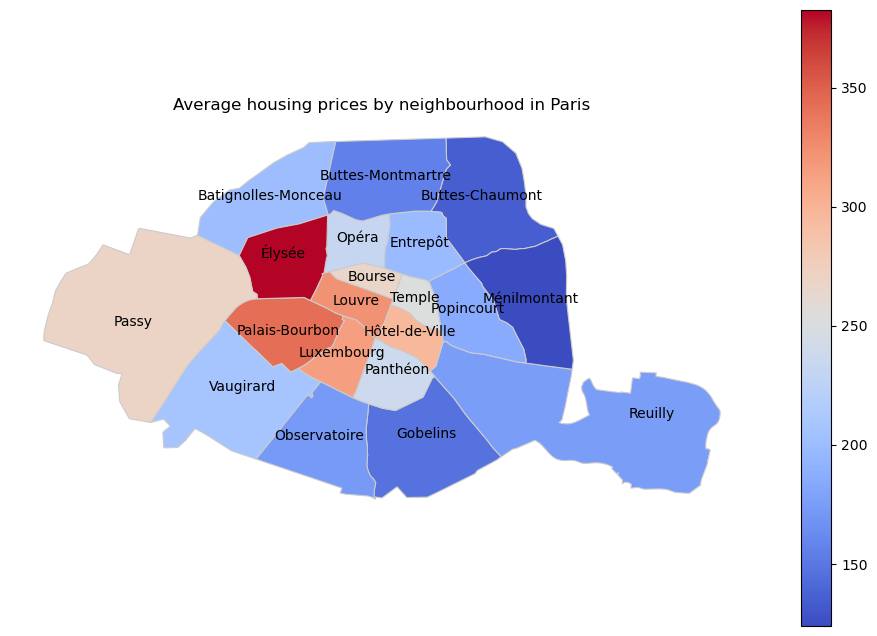

In [6]:
#Heatmap : Average housing prices by neighbourhood in Paris

import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the data
df = pd.read_csv('cleaned_listings.csv')

# Convert the 'price' column to numeric, errors='coerce' will turn invalid parsing into NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Now drop any rows with NaN in 'price' column (which were originally non-numeric values)
df = df.dropna(subset=['price'])

# Create a GeoDataFrame from the cleaned DataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS of geo_df to match that of neighborhoods
geo_df.set_crs("EPSG:4326", inplace=True)

# Load the shapefile of Paris neighborhoods
neighborhoods = gpd.read_file('neighbourhoods.geojson')

# Perform a spatial join between the listings and the neighborhoods
merged_data = gpd.sjoin(geo_df, neighborhoods, how='inner', predicate='within')

# Calculate the average price for each neighborhood
avg_price = merged_data.groupby('neighbourhood').mean(numeric_only=True)['price']

# Merge the average prices with the neighborhoods GeoDataFrame
neighborhoods = neighborhoods.set_index('neighbourhood').join(avg_price)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the neighborhoods colored by average price
neighborhoods.plot(column='price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add neighborhood names to the map
for idx, row in neighborhoods.iterrows():
    plt.annotate(text=idx, xy=row.geometry.representative_point().coords[0], horizontalalignment='center')

# The title
ax.set_title('Average housing prices by neighbourhood in Paris')

# To avoid displaying the latitude and longitude axes as they are not useful
plt.axis('off')

# To show the map
plt.show()


<font color='red'>Results :</font> **The centre of Paris** is the most expensive in terms of prices per district, particularly towards the Champs Elysées. **The lowest average price is in the north-east of Paris**, although most of the arrondissements on the outskirts are significantly cheaper than the centre. Ménilmontant is the cheapest area of Paris. 

_______________________________________________________________________


### <font color='blue'>N°2 Heatmap : Average housing prices per person by neighbourhood in Paris</font> 

We thought it would be useful to produce a map showing **prices per person per neighbourhood**, to give a better idea of AirBnB prices in the city. Depending on whether you are travelling alone or accompanied, it may be more or less advantageous to take a larger flat, which will cost less per person. 

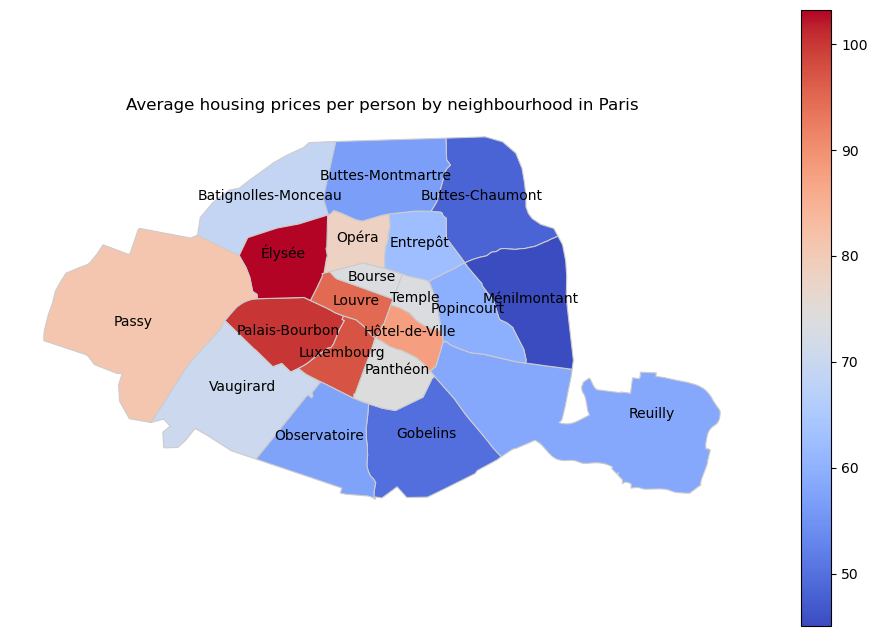

In [7]:
#Heatmap : Average housing prices per person by neighbourhood in Paris

import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

# Load the data
df = pd.read_csv('cleaned_listings.csv')

# Convert the 'price' and 'price_per_person' columns to numeric, errors='coerce' will turn invalid parsing into NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price_per_person'] = pd.to_numeric(df['price_per_person'], errors='coerce')

# Now drop any rows with NaN in 'price' or 'price_per_person' column (which were originally non-numeric values)
df = df.dropna(subset=['price', 'price_per_person'])

# Create a GeoDataFrame from the cleaned DataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS of geo_df to match that of neighborhoods
geo_df.set_crs("EPSG:4326", inplace=True)

# Load the shapefile of Paris neighborhoods
neighborhoods = gpd.read_file('neighbourhoods.geojson')

# Perform a spatial join between the listings and the neighborhoods
merged_data = gpd.sjoin(geo_df, neighborhoods, how='inner', predicate='within')

# Calculate the average price per person for each neighborhood
avg_price_per_person = merged_data.groupby('neighbourhood').mean(numeric_only=True)['price_per_person']

# Merge the average prices per person with the neighborhoods GeoDataFrame
neighborhoods = neighborhoods.set_index('neighbourhood').join(avg_price_per_person)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))

# The neighborhoods colored by average price per person
neighborhoods.plot(column='price_per_person', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add neighborhood names to the map
for idx, row in neighborhoods.iterrows():
    plt.annotate(text=idx, xy=row.geometry.representative_point().coords[0], horizontalalignment='center')  
        
# The title
ax.set_title('Average housing prices per person by neighbourhood in Paris')

#To avoid displaying the latitude and longitude axes as they are not useful
plt.axis('off')

# To show the map
plt.show()

<font color='red'>Results :</font> **The centre of Paris** is still the most expensive in terms of prices per neighbourhood, it's a little more expensive per person. Overall, there is no significant difference between the price per person and the price per neighbourhood. 

_______________________________________________________________________

### <font color='blue'> N°3 : Graphs analyzing correlation between "price_per_person" and "review_scores_rating" </font>

We wanted to analyze **possible correlations** between price_per_person and other variables in order to decide which variables we wanted to use for the modeling, in this case we chose "price_per_person" and "review_scores_rating".

Text(0, 0.5, 'Review scores rating')

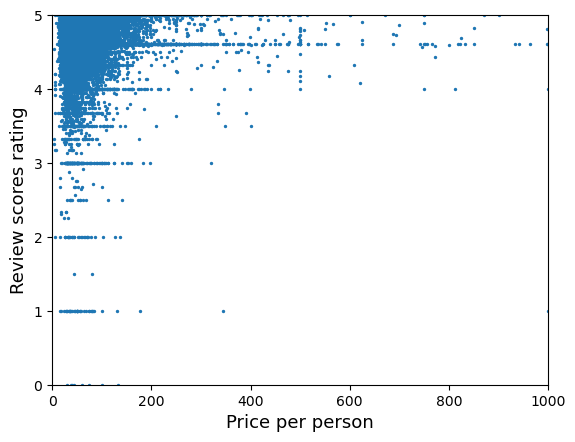

In [8]:
plt.scatter(df['price_per_person'], df['review_scores_rating'], s=2)
plt.axis ([0,1000, 0, 5])
plt.xlabel ("Price per person", size = 13)
plt.ylabel ("Review scores rating", size = 13)

### <font color='blue'> N°3.1</font>

Since the relation between the variables was not so clear before we chose to "zoom in" on the graph.

Text(0, 0.5, 'Review scores rating')

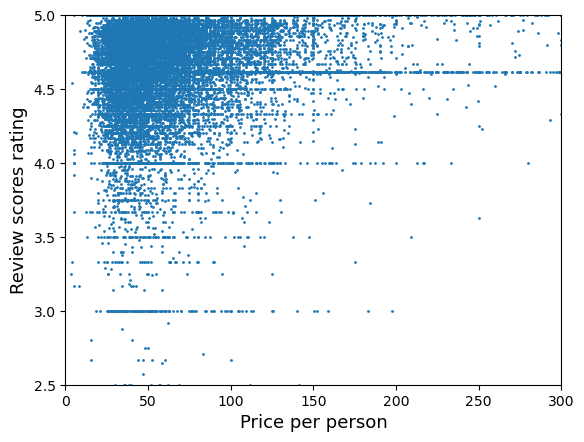

In [9]:
plt.scatter(df['price_per_person'], df['review_scores_rating'], s=1)
plt.axis ([0,300, 2.5, 5])
plt.xlabel ("Price per person", size = 13)
plt.ylabel ("Review scores rating", size = 13)

<font color='red'>Results :</font> There's somehow a **positive correlation** between price_per_person and review_scores_rating.

_______________________________________________________________________

### <font color='blue'> N°4 : Graphs analyzing correlation between "price_per_person" and "number_of_reviews"</font>

We wanted to analyze **possible correlations** between price_per_person and other variables in order to decide which variables we wanted to use for the modeling, in this case we chose "price_per_person" and "number_of_reviews".

Text(0, 0.5, 'Number of reviews')

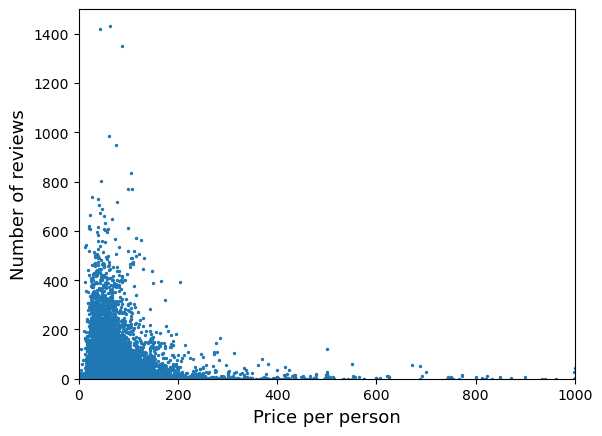

In [10]:
plt.scatter(df['price_per_person'], df['number_of_reviews'], s=2)
plt.axis ([0,1000, 0, 1500])
plt.xlabel ("Price per person", size = 13)
plt.ylabel ("Number of reviews", size = 13)

### <font color='blue'> N°4.1</font>

Since the relation between the variables was not so clear before we chose to "zoom in" on the graph.

Text(0, 0.5, 'Number of reviews')

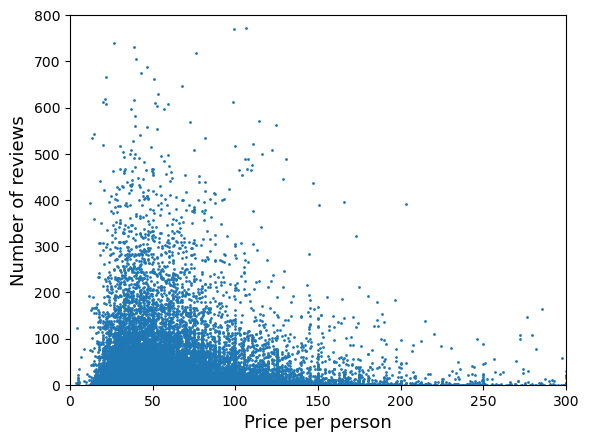

In [11]:
plt.scatter(df['price_per_person'], df['number_of_reviews'], s=1)
plt.axis ([0,300, 0, 800])
plt.xlabel ("Price per person", size = 13)
plt.ylabel ("Number of reviews", size = 13)

<font color='red'>Results :</font> There's **no correlation** between price_per_person and number_of_reviews.

_______________________________________________________________________
_______________________________________________________________________

### Where to rent the cheapest AirBnB accommodation closest to the Louvre ? 

<img src="Louvre.png" width="200"/>

Based on our main analysis (heat map number 2), if your going to Paris with friends and wants to stay close to the Louvre there are 4 major options:
 - If your aiming to stay *as close as possible* to the museum and *pay as little as possible*, you should look for a place at: **Bourse**.
 - If you are willing to stay a bit further and pay a little bit more, you can choose between: **Panthéon** OR **Temple**. 

# <font color='red'>Part 3: Data modelling</font> [Standard]

Based on the data we had we chose a multiple linear regression model, in order to do that it was necessary to transform how some columns were presented and also add new variables that we wanted to analyse

### <font color='blue'> Step 1 : Organize the data</font>

In [12]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = ['accommodates', 'bedrooms','beds', 'minimum_nights', 'maximum_nights', 'availability_365',
                        'review_scores_rating','price_per_person' ]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Create new columns for categorical columns and use a normalized value to represent each category

# Create new column for "room_type" based on the mapping
room_type_mapping = {'Entire home/apt': 1, 'Hotel room': 0.8, 'Private room': 0.6, 'Shared room': 0.4}
df['room_type_cat'] = df['room_type'].map(room_type_mapping)

# Create new column for "room_type" based on the mapping
host_response_time_mapping = {'within an hour': 1, 'within a few hours': 0.75, 'within a day': 0.5, 'a few days or more': 0.25}
df['host_response_time_cat'] = df['host_response_time'].map(host_response_time_mapping)

# Convert boolean values to integers
booleans = {'t': 1, 'f': 0}
columns_to_convert = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for column in columns_to_convert:
    df[column + '_new'] = df[column].map(booleans)

### <font color='blue'> Step 2 : Create and normalize the new variable</font>

In [13]:
import geopy
from geopy.distance import distance

# Create a column with the distance between the AirBnb and the Louvre
import geopy.distance

# Latitude and longitude of the Louvre
louvre_coordinates = (48.861147, 2.338027)

# Calculate the distance to the Louvre and add the corresponding column
df['distance_to_louvre'] = df.apply(lambda row: geopy.distance.distance((row['latitude'], row['longitude']), louvre_coordinates).km, axis=1)

#Normalize distance to the Louvre
distance_normalize = ['distance_to_louvre']
df[distance_normalize] = scaler.fit_transform(df[distance_normalize])

### <font color='blue'> Step 3 : Matrix to analyze variables correlation to our target</font>

We wanted to create a matrix with **the correlation between price and other variables** from our dataset in order to determine which characteristics might influence price. 

<Axes: >

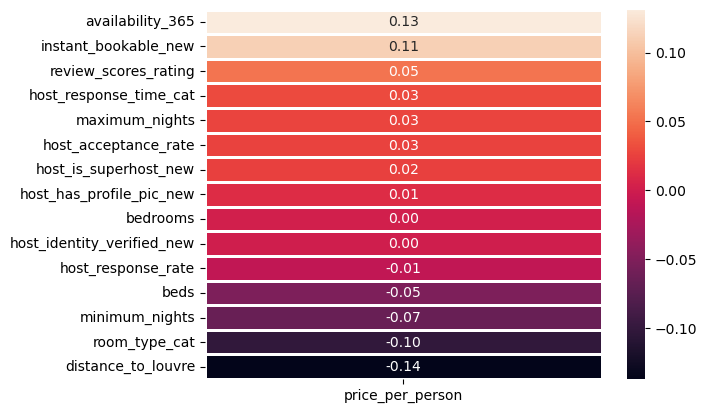

In [14]:
import seaborn as sn
correlation = df.corr(numeric_only=True)

# Columns to analyze the correlation
selected_columns = ['host_response_time_cat', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost_new',
                    'host_has_profile_pic_new', 'host_identity_verified_new', 'room_type_cat', 'bedrooms','beds',
                    'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating','instant_bookable_new',
                    'distance_to_louvre']
#Target variable
target_variable = 'price_per_person'

# Check if the selected columns are present in the correlation matrix index
filtered_correlation = correlation.loc[correlation.index.isin(selected_columns), target_variable]

# Convert to DataFrame and sort by descending order
filtered_correlation_df = filtered_correlation.to_frame()
filtered_correlation_df_sorted = filtered_correlation_df.sort_values(by=target_variable, ascending=False)

# Plot the sorted correlations of the target variable with the selected columns
sn.heatmap(filtered_correlation_df_sorted, annot=True, fmt=".2f", linewidths=0.8, annot_kws={"size": 10})

<font color='red'>Results :</font> 

- **Close to 1**: positive correlation, which means that when the price increases, the value of the other variable also increases.
- **Close to 0**: no correlation, the price increase has no impact on the other variable.
- **Close to -1**: negative correlation, i.e. when the price increases, the value of the other variable decreases. 

By analysing this matrix, we can conclude that : 

The higher the price, the closer the accomodation is to the Louvre. 
Also, accomodations that are available for more days in a year might be more expensive. 
The other variables have a weaker correlation with price, which means that they do not significantly influence the price of AirBnB accommodation. 

### <font color='blue'> N°1 : Initial model to predict "price_per_person" in relation to the distance to the Louvre</font>

We tried to run a linear regression model to predict the price in relation to the distance to the Louvre with the different accomodations. 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import geopy.distance

# Definition of input and output variables
features = ['distance_to_louvre']
target = 'price_per_person'

# Separation of data into training and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)

print(f"RMSE: {lr_rmse}")

RMSE: 0.01782421673851428


<font color='red'>Results :</font> RMSE (Root Mean Square Error) measures the differences between the values predicted by a model and the actual values. This RMSE of 241.79720658191408 means the predicted Airbnb prices differ from the actual prices by about €241.79, on average.

It is a high error, which means that using only the distance to the Louvre to predict the price of an Airbnb is not accurate and we should use other factors that are influencing accomodations' price.

### <font color='blue'> N°2 : Models to predict price in relation to the other variables</font>

We tried several models to predict the price as a function of different variables. 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Model 1: all main variables considered and "price_per_person"

In [17]:
predictors_model_1 = ['host_response_time_cat', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost_new',
                      'host_has_profile_pic_new', 'host_identity_verified_new', 'room_type_cat', 'bedrooms', 'beds',
                      'minimum_nights', 'maximum_nights', 'availability_365', 'review_scores_rating', 'instant_bookable_new',
                      'distance_to_louvre']

X = df[predictors_model_1]
y = df['price_per_person']


# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Make predictions using the model
y_pred = model_1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MSE_model 1: ", mse)
print("RMSE_model 1: ", rmse)
print("R2_model 1: ", r2)

MSE_model 1:  0.00029448551025151507
RMSE_model 1:  0.01716058012572754
R2_model 1:  0.10574843832664138


#### Model 2: 4 main correlations to "price_per_person": 'instant_bookable_new', 'distance_to_louvre', 'room_type_cat', 'availability_365'

In [18]:
predictors_model_2 = ['instant_bookable_new','distance_to_louvre', 'room_type_cat', 'availability_365']

X = df[predictors_model_2]
y = df['price_per_person']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MSE_model 2: ", mse)
print("RMSE_model 2: ", rmse)
print("R2_model 2: ", r2)

MSE_model 2:  0.00030496708060698475
RMSE_model 2:  0.017463306691660224
R2_model 2:  0.07391950164597927


#### Model 3: only the 2 strongest correlations to 'price_per_person': 'distance_to_louvre', 'availability_365'

In [19]:
predictors_model_3 = ['distance_to_louvre','availability_365']

X = df[predictors_model_3]
y = df['price_per_person']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MSE_model_3: ", mse)
print("RMSE_model_3: ", rmse)
print("R2_model_3: ", r2)

MSE_model_3:  0.0003101977720712172
RMSE_model_3:  0.017612432315589382
R2_model_3:  0.058035684454001535


<font color='red'>Results :</font> The first model considers all the variables in the dataset, which could explain why it obtains a better score and is more reliable than the other two models, which only take a limited number of variables into account. 

# <font color='red'>Conclusion</font>

To conclude, we can make a few recommendations about renting an AirBnB accomodation in Paris for a trip: 
- If you want to stay in Paris and have no preference in terms of location (you don't mind using the metro to get around) then it's best to rent in the arrondissements outside the city centre, which are much cheaper.
- If you want to stay close to the Louvre, it's best to avoid renting in the centre-west of Paris, which is the most expensive part of the capital; renting directly in the Louvre district isn't a good idea either. It's better to rent in the Bourse, Panthéon or Temple. 